In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17003, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17003 (delta 107), reused 113 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (17003/17003), 15.72 MiB | 17.50 MiB/s, done.
Resolving deltas: 100% (11636/11636), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
!unzip data.zip -d /content/

Archive:  data.zip
   creating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/data.yaml  
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/README.dataset.txt  
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/README.roboflow.txt  
   creating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/
   creating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg  
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--119-_jpg.rf.d7b946189406fa5cb1f936ba2edcfa11.jpg  
  inflating: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--132-_jpg.rf.b38cfb540837f6de31bee356952362ca.jpg  
  inflating: /content/Apple Sorting.v6-damagedap

In [4]:
data_yaml_content = """
train: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/train
val: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/valid
test: /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test

nc: 1
names: ['damaged_apple']
"""


with open('/content/data.yaml', 'w') as file:
    file.write(data_yaml_content)


In [5]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --name damaged_apple_detection


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-10-18 11:32:09.503357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 11:32:09.524443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 11:32:09.530287: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/data.ya

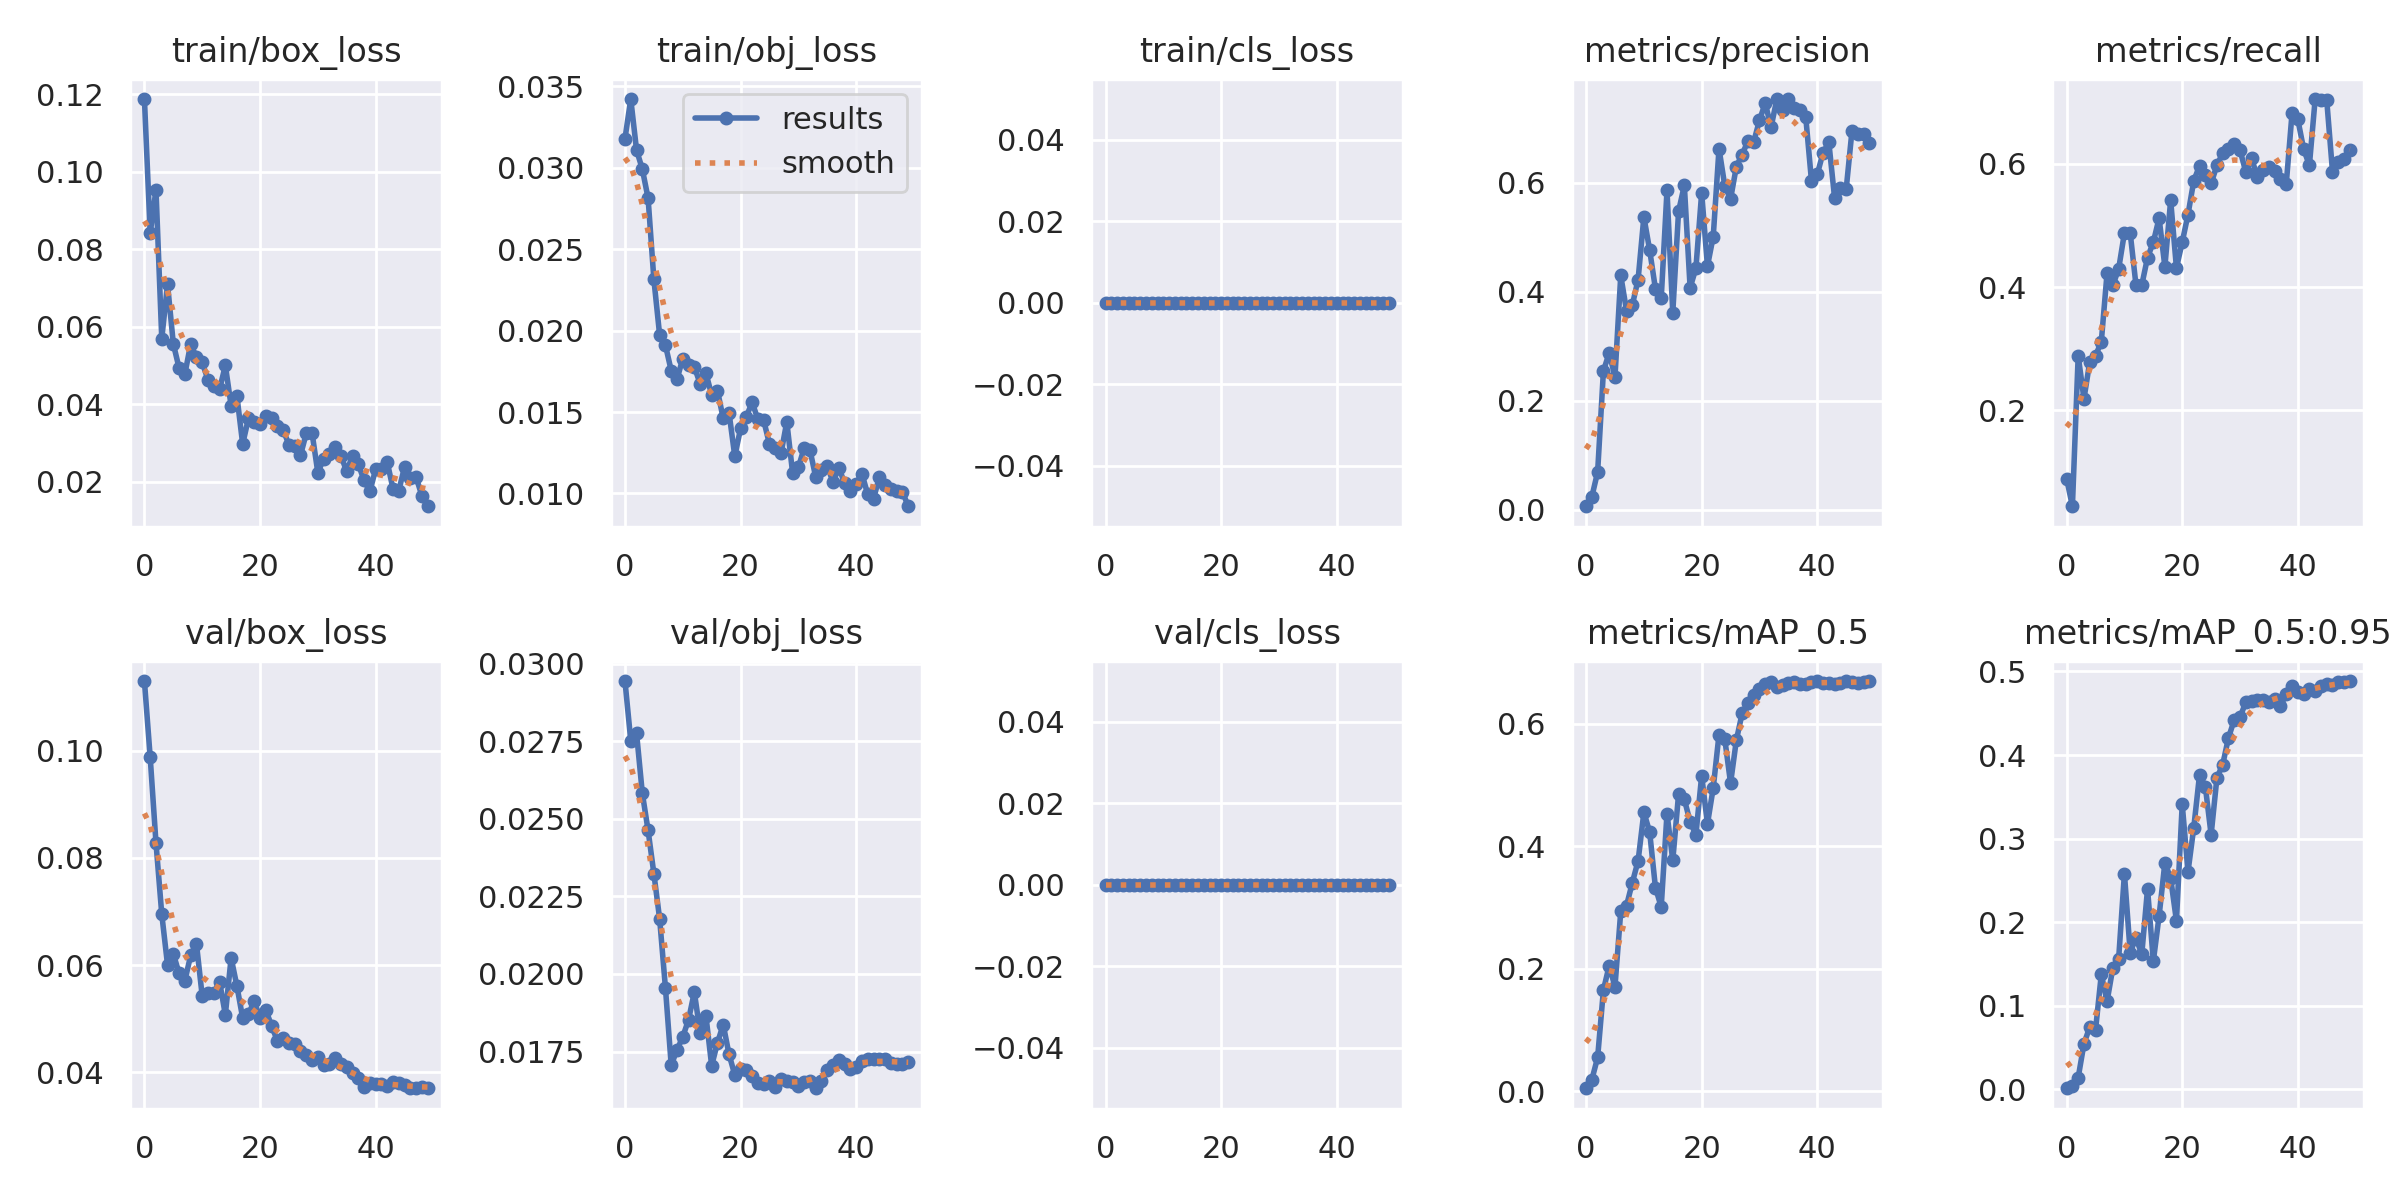

In [6]:
from IPython.display import Image
Image(filename='runs/train/damaged_apple_detection/results.png')

In [12]:
!python detect.py --weights runs/train/damaged_apple_detection/weights/best.pt --img 640 --conf 0.4 --source /content/Apple\ Sorting.v6-damagedapples_raw-images.yolov11/test/images


detect: weights=['runs/train/damaged_apple_detection/weights/best.pt'], source=/content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-376-gbcd88eaf Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg: 416x640 3 damaged_apples, 31.9ms
image 2/5 /content/Apple Sorting.v6-damagedapples_raw-images.yolov11/test

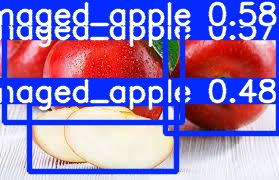

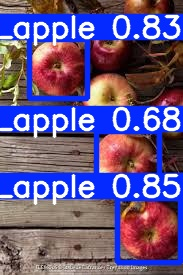

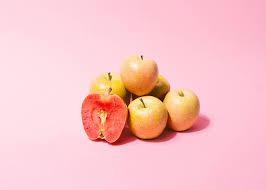

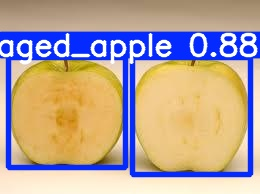

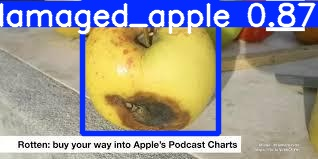

In [19]:
import os
from IPython.display import Image, display

# Display 25 test images with detections
results_path = 'runs/detect/exp/'
images = os.listdir(results_path)

num_images_to_display = 25

images_to_display = images[:num_images_to_display] if len(images) >= num_images_to_display else images

for image_name in images_to_display:
    display(Image(filename=os.path.join(results_path, image_name)))


In [20]:
import shutil

output_folder = '/content/processed_images/'  # Define a folder to save the processed images
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

for image_name in images:
    # Move or copy each image to the output folder
    shutil.copy(os.path.join(results_path, image_name), os.path.join(output_folder, image_name))
